<a href="https://colab.research.google.com/github/5hv5hvnk/TabularPlaygroundSeries/blob/master/TBS_JAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneGroupOut

In [4]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')
sam = pd.read_csv('sample_submission.csv')

In [7]:
MV1 = df1.isnull().sum()
MV2 = df2.isnull().sum()

print(f'Missing Value 1:  {MV1[MV1 > 0]}')
print(f'Missing Value 2:  {MV2[MV2 > 0]}')

Missing Value 1:  Series([], dtype: int64)
Missing Value 2:  Series([], dtype: int64)


In [8]:
df1.head(5)

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
3,5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
4,8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


In [9]:
df2.head(5)

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0,0.353600,0.738780,0.600939,0.293377,0.285691,0.458006,0.620704,0.422249,0.369203,0.435727,0.550540,0.699134,0.286864,0.364515
1,2,0.907222,0.189756,0.215531,0.869915,0.301333,0.528958,0.390351,0.521112,0.794779,0.798580,0.446475,0.449037,0.916964,0.513002
2,6,0.179287,0.355353,0.623972,0.437812,0.282476,0.320826,0.386789,0.776422,0.222268,0.229102,0.211913,0.222651,0.327164,0.827941
3,7,0.359385,0.181049,0.551368,0.206386,0.280763,0.482076,0.506677,0.362793,0.379737,0.345686,0.445276,0.518485,0.299028,0.598166
4,10,0.335791,0.682607,0.676481,0.219465,0.282861,0.581721,0.748639,0.350158,0.448915,0.506878,0.817721,0.805895,0.790591,0.249275


In [11]:
data1 = df1.copy()
data2 = df2.copy()

In [ ]:
X = data1.drop(columns = ['target'])

In [13]:
y1 = data1.target

In [14]:
train_X, val_X, train_y1, val_y1 = train_test_split(X, y1, test_size=0.50, random_state=123)

In [15]:
val_X.to_csv("val_X.csv",index=False)

val_y1.to_csv("val_y1.csv",index=False)

In [16]:
model1v = XGBRegressor(max_depth=6,
                       n_estimators=250,
                       learning_rate=0.08,
                       subsample=0.7,
                       alpha=0.5,
                       random_state=123)                           
        
model1v.fit(train_X, train_y1, verbose=100)
oof_pred1 = model1v.predict(val_X)

oof_pred1 = np.clip(oof_pred1, 0.30, y1.max())



[14:29:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [17]:
print(mean_absolute_error(val_y1, oof_pred1))

0.5885407825445479


In [18]:
model1v.feature_importances_

array([0.02922962, 0.05562525, 0.07497352, 0.08366495, 0.07736058,
       0.05837726, 0.06508572, 0.06822507, 0.05908398, 0.06245903,
       0.07123949, 0.06923561, 0.07384491, 0.08253135, 0.06906367],
      dtype=float32)

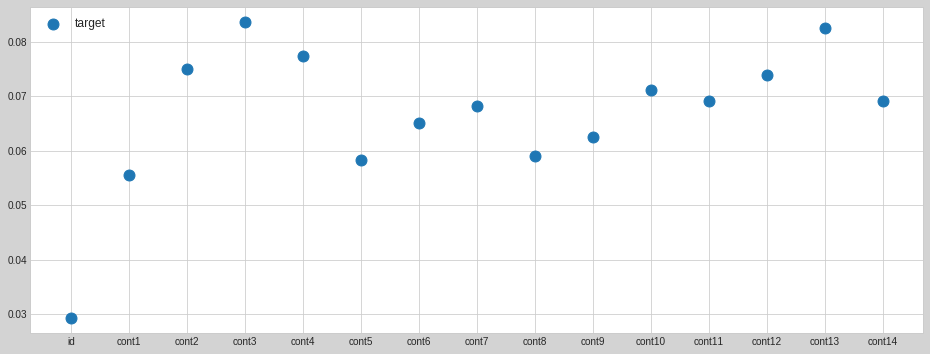

In [19]:
axis_x  = X.columns.values
axis_y1 = model1v.feature_importances_

plt.style.use('seaborn-whitegrid') 
plt.figure(figsize=(16, 6), facecolor='lightgray')

plt.scatter(axis_x, axis_y1, s=120, label='target') 
plt.legend(fontsize=12, loc=2)
plt.show() 

In [24]:
model1 = XGBRegressor(max_depth=6,
                      n_estimators=250,
                      learning_rate=0.08,
                      subsample=0.7,
                      alpha=0.5,
                      random_state=314)                         

model1.fit(X, y1)
pred1 = model1.predict(data2)
pred1 = np.clip(pred1, 0.30, y1.max())
display(pred1, pred1.shape) 

[14:49:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([7.874655 , 8.005341 , 7.9479446, ..., 8.110463 , 8.070707 ,
       7.877386 ], dtype=float32)

(200000,)

In [25]:
sub_xgb = data2.copy()
sub_xgb['target'] = pred1
sub_xgb

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,0,0.353600,0.738780,0.600939,0.293377,0.285691,0.458006,0.620704,0.422249,0.369203,0.435727,0.550540,0.699134,0.286864,0.364515,7.874655
1,2,0.907222,0.189756,0.215531,0.869915,0.301333,0.528958,0.390351,0.521112,0.794779,0.798580,0.446475,0.449037,0.916964,0.513002,8.005341
2,6,0.179287,0.355353,0.623972,0.437812,0.282476,0.320826,0.386789,0.776422,0.222268,0.229102,0.211913,0.222651,0.327164,0.827941,7.947945
3,7,0.359385,0.181049,0.551368,0.206386,0.280763,0.482076,0.506677,0.362793,0.379737,0.345686,0.445276,0.518485,0.299028,0.598166,8.183584
4,10,0.335791,0.682607,0.676481,0.219465,0.282861,0.581721,0.748639,0.350158,0.448915,0.506878,0.817721,0.805895,0.790591,0.249275,8.249832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,499984,0.353856,0.677578,0.550852,0.869612,0.957635,0.255054,0.289138,0.635979,0.271399,0.282455,0.217169,0.219088,0.373261,0.272479,8.129244
199996,499985,0.243209,0.135627,0.218393,0.792798,0.547639,0.433520,0.549540,0.650107,0.453787,0.459689,0.450424,0.511176,0.318334,0.395747,8.190012
199997,499987,0.506973,0.683893,0.533434,0.192957,0.314381,0.358604,0.554455,0.267105,0.396101,0.445390,0.382656,0.397978,0.381235,0.369464,8.110463
199998,499988,0.347870,0.553112,0.495284,0.861500,0.816914,0.298478,0.275964,0.265841,0.334250,0.252635,0.213589,0.285223,0.336772,0.388505,8.070707


In [27]:
sub = pd.DataFrame(columns = ['id', 'target'])
sub['id'] = sub_xgb['id']
sub['target']=sub_xgb['target']
sub.to_csv("submission_xgb.csv",index=False)